In [1]:
import numpy as np
import pandas as pd
from logistic_regression_newton_raphson import LogisticRegression
from linear_regression import LinearRegression
from sklearn.feature_selection import RFE
from data_loader import *
from scorer import *

In [2]:
X_df, X, y, test_X_df, test_X, test_y = get_data()
y = y.reshape((-1, 1))
test_y = test_y.reshape((-1, 1))

### Logistic Regression

In [3]:
model = LogisticRegression(tol=1e-5)

In [4]:
model.fit(X, y, logging=False)

Loss: [[ 7884.72197919]]
Final Accuracy: 0.924133944056566
Loss: [[ 9936.84276287]]
Final Accuracy: 0.8860452706007915
Loss: [[ 3012.748096]]
Final Accuracy: 0.9831902877217948
Loss: [[ 2392.10516076]]
Final Accuracy: 0.9844354515942545


In [5]:
pred = model.predict(X)
test_pred = model.predict(test_X)

In [6]:
score_report(test_y, test_pred)

Maximum score: 1921.0 
Baseline (all unrelated) score: 1249.5 
Predictions score: 1850.5

Predictions score relative to max score: 0.963300364393545%

Accuracy: 0.8951580632252901

Class-wise F1: 
Agree: 0.1472684085510689
Discuss: 0.7692307692307692
Disagree: 0.0
Unrelated: 0.9838862559241706

Mean F1: 0.47509635842650216

Confusion Matrix:
[[  31  313    0   24]
 [  17  810    0   64]
 [   5   70    0    9]
 [   0   22    0 3633]]
Confusion matrix, without normalization


/cs/student/msc/dsml/2017/scimpian/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


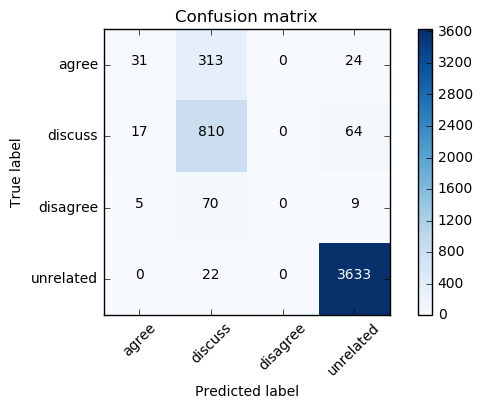

In [7]:
plt.show()

In [8]:
selector = RFE(model, 5, step=1)
selector.fit(X, y)

/cs/student/msc/dsml/2017/scimpian/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Loss: [[ 7884.72197919]]
Final Accuracy: 0.924133944056566
Loss: [[ 9936.84276287]]
Final Accuracy: 0.8860452706007915
Loss: [[ 3012.748096]]
Final Accuracy: 0.9831902877217948
Loss: [[ 2392.10516076]]
Final Accuracy: 0.9844354515942545
Loss: [[ 7888.37815629]]
Final Accuracy: 0.924133944056566
Loss: [[ 9946.0640493]]
Final Accuracy: 0.885822919909281
Loss: [[ 3013.49056057]]
Final Accuracy: 0.9831902877217948
Loss: [[ 2408.89616815]]
Final Accuracy: 0.9844132165251034
Loss: [[ 7888.38048979]]
Final Accuracy: 0.924133944056566
Loss: [[ 9947.88611556]]
Final Accuracy: 0.8855783341486192
Loss: [[ 3014.94363082]]
Final Accuracy: 0.9831902877217948
Loss: [[ 2409.37444514]]
Final Accuracy: 0.9843465113176502
Loss: [[ 7893.03622618]]
Final Accuracy: 0.9240672388491128
Loss: [[ 9954.2045871]]
Final Accuracy: 0.8854671588028639
Loss: [[ 3016.17946789]]
Final Accuracy: 0.9831902877217948
Loss: [[ 2410.0249305]]
Final Accuracy: 0.9843242762484992
Loss: [[ 7911.47049862]]
Final Accuracy: 0.923889

RFE(estimator=LogisticRegression(tol=1e-05), n_features_to_select=5, step=1,
  verbose=0)

In [16]:
sorted_col_idxs = np.argsort(selector.ranking_)
sorted_cols = [(X_df.columns.values[idx], selector.ranking_[idx]) 
               for idx in sorted_col_idxs]

### Ranking according to recursive feature elimination

In [17]:
sorted_cols

[('prod_pos', 1),
 ('cosine_tf_idf', 1),
 ('article_pos', 1),
 ('article_neu', 1),
 ('prod_neg', 1),
 ('cosine_svd', 2),
 ('prod_neu', 3),
 ('headline_neu', 4),
 ('cosine_word2vec_mean', 5),
 ('cosine_embd_mean', 6),
 ('article_neg', 7),
 ('headline_neg', 8),
 ('prod_compound', 9),
 ('headline_pos', 10),
 ('article_compound', 11),
 ('cosine_lda', 12),
 ('kl_jelinek_mercer', 13),
 ('cosine_bow', 14),
 ('headline_compound', 15),
 ('kl_dirichlet', 16)]

### Evaluate model according to selected features

In [21]:
test_pred = selector.predict(test_X)

In [22]:
score_report(test_y, test_pred)

Maximum score: 1921.0 
Baseline (all unrelated) score: 1249.5 
Predictions score: 1768.5

Predictions score relative to max score: 0.9206142634044768%

Accuracy: 0.8775510204081632

Class-wise F1: 
Agree: 0.08457711442786069
Discuss: 0.728780487804878
Disagree: 0.0
Unrelated: 0.9710455764075068

Mean F1: 0.44610079466006136

Confusion Matrix:
[[  17  308    0   43]
 [  15  747    0  129]
 [   2   71    0   11]
 [   0   33    0 3622]]
Confusion matrix, without normalization


/cs/student/msc/dsml/2017/scimpian/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


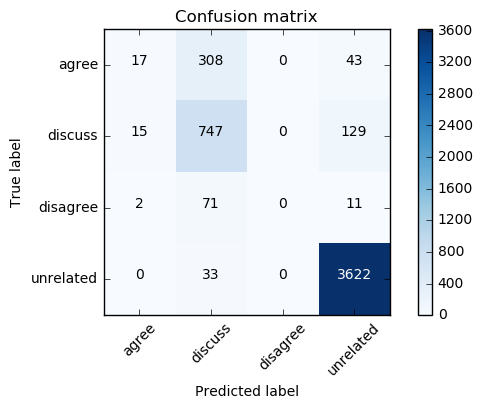

In [23]:
plt.show()

## Linear Regression

In [9]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

In [10]:
max_acc = 0
max_lr = 0

for lr in learning_rates:
    model = LinearRegression(tol=1e-6, learning_rate=lr)
    model.fit(X, y)
    test_pred = model.predict(test_X)
    test_acc = accuracy(test_y, np.round(test_pred))
    print("Lr: {}, Acc: {}".format(lr, test_acc))
    if  test_acc > max_acc:
        max_acc = test_acc
        max_lr = lr

Lr: 0.1, Acc: 0.8155262104841937
Lr: 0.01, Acc: 0.8055222088835534
Lr: 0.001, Acc: 0.7673069227691076
Lr: 0.0001, Acc: 0.6208483393357342


#### Closed form test accuracy

In [11]:
model.fit_closed_form(X, y)
test_pred = model.predict(test_X)
test_acc = accuracy(test_y, np.round(test_pred))
print("Acc: {}".format(test_acc))

Loss closed form: 0.10947123930943108
Acc: 0.8185274109643857


In [12]:
test_pred[test_pred < 0] = 0
test_pred[test_pred > 3] = 3
score_report(test_y, np.round(test_pred))

Maximum score: 1921.0 
Baseline (all unrelated) score: 1249.5 
Predictions score: 1704.0

Predictions score relative to max score: 0.8870380010411244%

Accuracy: 0.8191276510604242

Class-wise F1: 
Agree: 0.19343065693430658
Discuss: 0.6760716223548563
Disagree: 0.05137614678899082
Unrelated: 0.9643059490084986

Mean F1: 0.4712960937716631

Confusion Matrix:
[[  53  254   61    0]
 [ 118  623  149    1]
 [   8   62   14    0]
 [   1   13  237 3404]]
Confusion matrix, without normalization


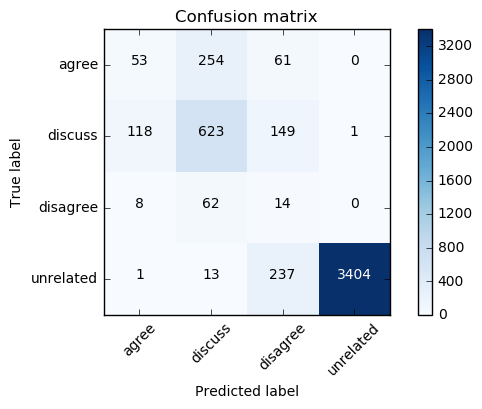

In [13]:
plt.show()

In [31]:
sorted_col_idxs = np.argsort(model._W**2)[0]

sorted_cols = [(X_df.columns.values[idx], model._W[0, :idx]) 
               for idx in sorted_col_idxs]